#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 6</font>

### Setup

In [2]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.05.G6) Digitized Timeseries - Computing Phase from Discrete Timeseries with Noise</font>

### <font color=red>DSP.05.G6.a) Obtaining Phase Measures from Digitized Timeseries with Noise</font>

The Lesson 5 Tutorial section examined the reliability of magnitude measures when noise was added to a timeseries. This section will briefly examine the reliability of phase measures when noise is added to a timeseries.

Create a 40 Hz timeseries (with gain of 2 and a 45° phase offset) with noise, 1 second in length, digitized
at 500 Hz (over a 1-second interval, a sample is collected every 0.002 seconds = 1/500). (Throughout this section, we will create noise distributions with a mean value of 0 and a standard deviation of the distribution (the spread of width of the distribution) of 0.5. If you need a refresher, see Lesson 4 Basics for an extended discussion of random noise distributions.)

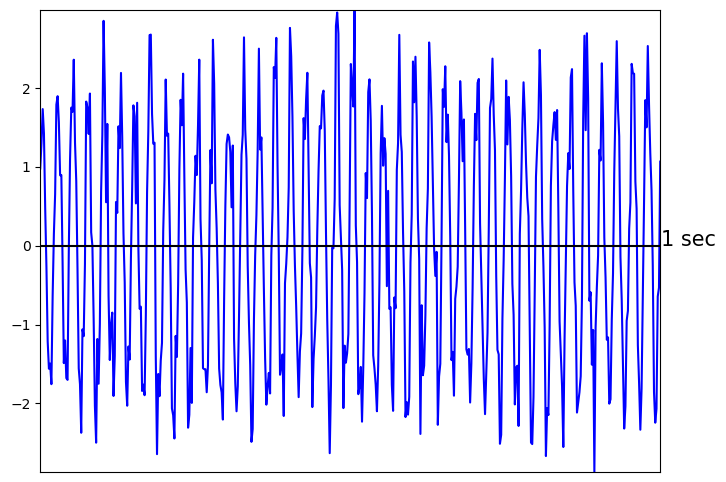

In [18]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 2 * np.sin(2*np.pi * freq * time + np.pi/4)+noise 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Although 40 Hz activity is visible, the 40 Hz signal is distorted.

Plot the absolute value of 2 *Sin[40 x 2$π$ + $π$/4 ] $e^{i 40 x 2 π}$ as a function of x. 

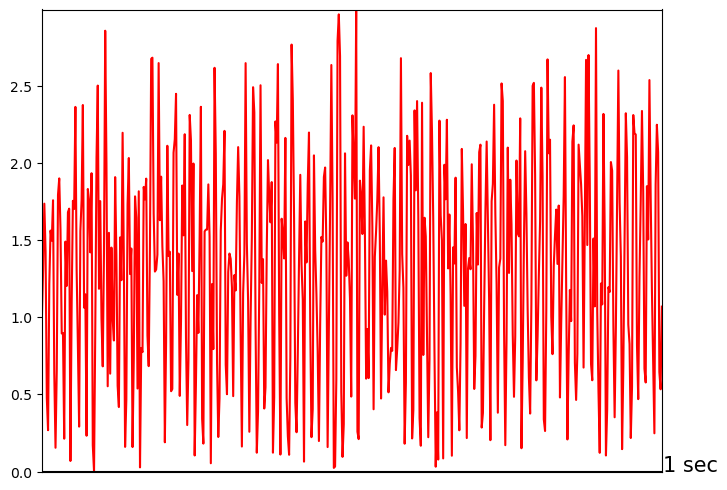

In [19]:
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries2 = abs(timeseries * complex_amplitude)

make_plot_1(time,timeseries2,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Looks generally similar to a plot obtained by multiplying two 40 Hz sine waves (obtaining 80 peaks with all
activity above the x axis). The plot runs from 0 to 500 points.

Calculate the magnitude and phase of 40 Hz activity.

In [20]:
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(1.3952+1.4306j)

In [21]:
abs(spectrum)

1.9982991267575532

In [22]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
abs(phasedegrees)

44.28

This looks promising. Even with the noise, the magnitude of 40 Hz (a gain of 2) was correctly identified (approximately - varies a bit depending on the exact set of random noise values added). What about
the above complex term gives away the fact that the 40 Hz phase (45 degrees) was correctly modeled?

### <font color=red>DSP.05.G6.b) Obtaining Phase Measures from Digitized Timeseries with Noise</font>

Create the same 40 Hz timeseries but this time with a gain of 1. Decreasing the gain by half decreases
the signal-to-noise ratio.

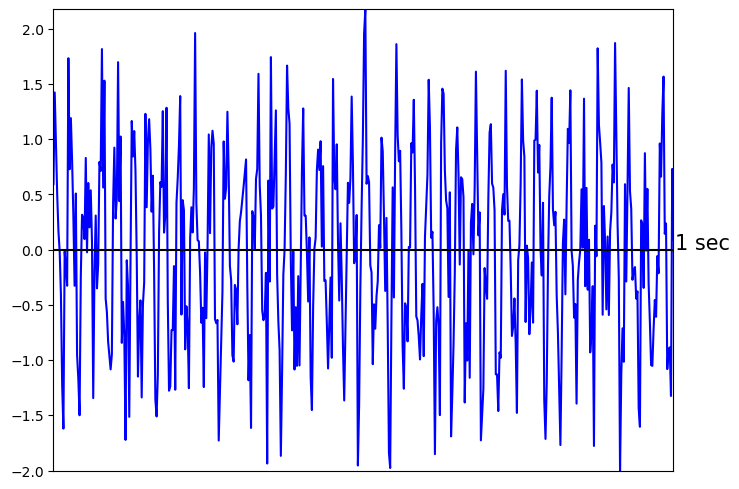

In [23]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 1 * np.sin(2*np.pi * freq * time + np.pi/4)+noise 

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

40 Hz activity is clearly present, but slightly difficult to observe and perhaps to detect.

Plot the absolute value of (1 Sin[40 x 2$π$ + $π$/4 ]) $e^{i 40 x 2 π}$ as a function of x.

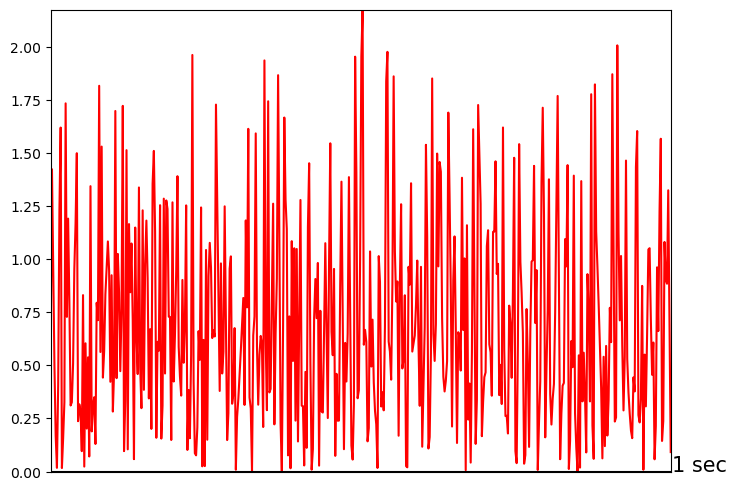

In [24]:
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries2 = abs(timeseries * complex_amplitude)

make_plot_1(time,timeseries2,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Looks similar to a plot obtained by multiplying two 40 Hz sine waves (obtaining 80 peaks with all
activity above the x-axis). The plot runs from 0 to 500 points.

Calculate the magnitude and phase of 40 Hz activity.

In [25]:
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(0.65+0.7106j)

In [26]:
abs(spectrum)

0.9630432804396696

In [27]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
abs(phasedegrees)

42.45

The output of the 'abs' function tells us that the magnitude of 40 Hz activity is approximately ______ .
(fill in blank)

The output of the 'arctan' function tells us that the phase of 40 Hz activity is approximately ______ .
(fill in blank)

What about the above complex term gives away the fact that the 40 Hz phase was more or less correctly modeled?

### <font color=red>DSP.05.G6.c) Obtaining Phase Measures from Digitized Timeseries with Noise</font>

Create a 40 Hz timeseries but with a gain of 0.1. Decreasing the gain by another 90% decreases the signal-to-noise
ratio.

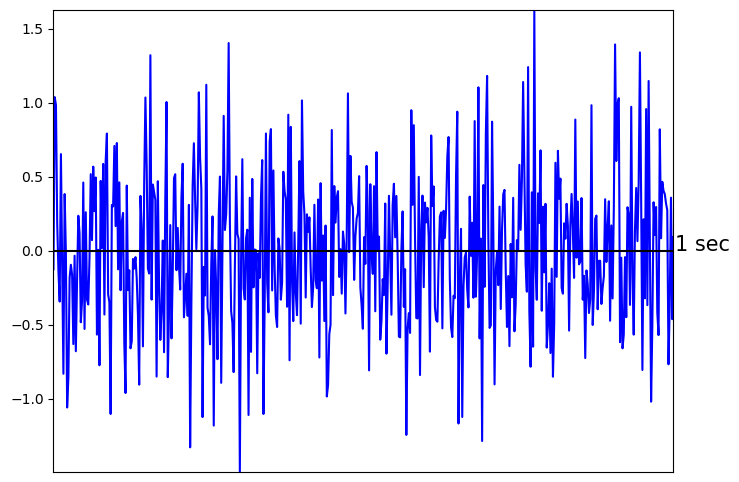

In [33]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 0.1 * np.sin(2*np.pi * freq * time + np.pi/4)+noise  

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

This time, the 40 Hz activity that we know is in there is not clearly visible.
Plot the absolute value of (0.1 Sin[40 x 2$π$ + $π$/4 ]) $e^{i 40 x 2 π}$ as a function of x.

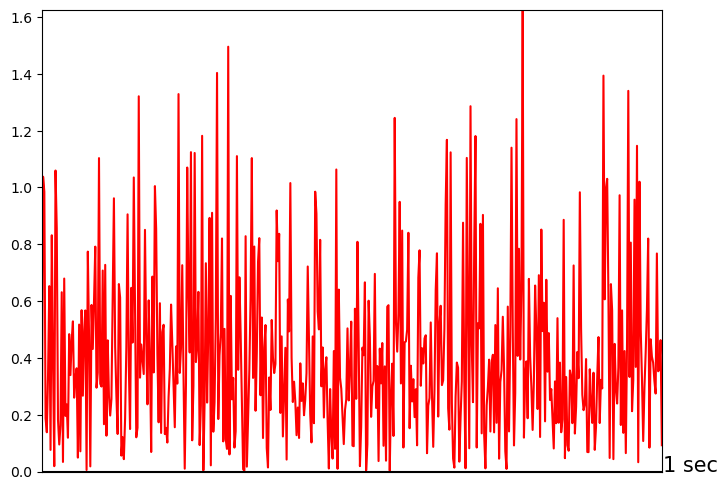

In [34]:
complex_amplitude = np.exp(2*np.pi * 40j * time)
timeseries2 = abs(timeseries * complex_amplitude)

make_plot_1(time,timeseries2,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude and phase of 40 Hz activity.

In [35]:
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(0.0718+0.093j)

In [36]:
abs(spectrum)

0.11749144649718124

In [37]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
abs(phasedegrees)

37.67

Rerun the above code a few times and examine how the magnitude and phase values change as the noise
sample changes.

What about the above complex term gives away the fact that the 40 Hz phase was not always correctly
modeled?

In addition, does the magnitude measure seem to be more accurately modeled than the phase
measure?

### <font color=red>DSP.05.G6.d) Obtaining Phase Measures from Digitized Timeseries with Noise</font>

Create the same 40 Hz timeseries but this time with gain of 0.01, significantly decreasing the signal-to-noise ratio.

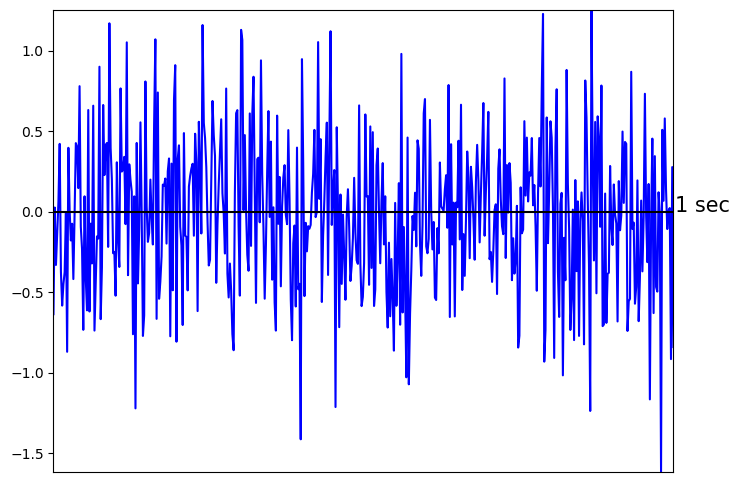

In [38]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 0.01 * np.sin(2 * np.pi * freq * time + np.pi/4)+noise  

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Calculate the magnitude and phase of 40 Hz activity.

In [39]:
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(0.0078+0.0146j)

In [40]:
abs(spectrum)

0.01655294535724685

In [41]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
abs(phasedegrees)

28.11

Rerun the above code a few times and look at how the magnitude and phase values change. 

What about the above complex term gives away the fact that the 40 Hz phase was not always correctly
modeled?

In addition, does the magnitude measure seem to be more accurately modeled than the phase
measure?

### <font color=red>DSP.05.G6.e) Judging Real Activity from Background Noise</font>

Create a power spectrum plot for a 40 Hz signal with a gain value of 1, a 45 degree phase offset, and with noise.

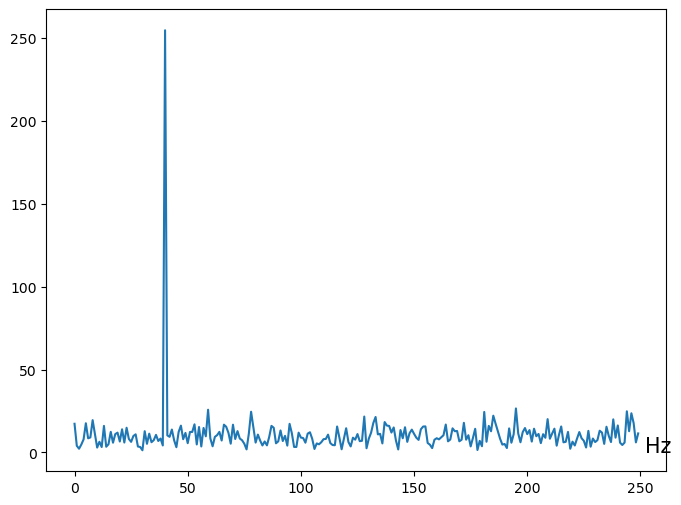

In [42]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))
timeseries = 1 * np.sin(2*np.pi * freq * time + np.pi/4) + noise 
make_plot_freq_1(timeseries,500)

plt.text(252,0,'Hz',fontsize=15)
plt.show()

The above plot shows magnitude values on the x axis from 0 to 250 Hz (we sampled at 500 Hz, so we plot only
to the Nyquist Frequency = 250 Hz).

Note that there is a 40 Hz spike and that the measure of 40 Hz activity is distinctly different from all other magnitude measures. This is fairly strong qualitative evidence that our estimate of 40 Hz activity is not simply noise.

In the Lesson 5 Tutorial section, code to quantitatively assess the accuracy of our 40 Hz magnitude value was developed. We only need to make a slight modification to that Tutorial code to examine the accuracy of our 40 Hz phase measure. 

Run the below code to create a plot of phase values from 0 to 250 Hz. 

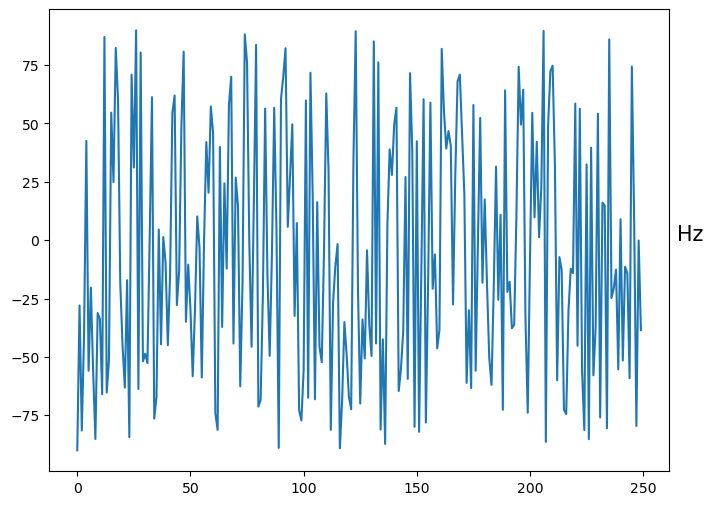

In [43]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))

timeseries = 1 * np.sin(2*np.pi * freq * time + np.pi/4) + noise
sample_rate = 500
duration = 1

n = sample_rate * duration
nhalf = round(n/2)

yf = fft(timeseries)
xf = fftfreq(n, 1 / sample_rate)

yf = yf[0:nhalf]
xf = xf[0:nhalf]

phaseradians = np.arctan(np.real(yf)/np.imag(yf))
phasedegrees = phaseradians * 180 / np.pi

plt.plot(xf, phasedegrees)

# Adding text to the figure
plt.text(265,0,'Hz',fontsize=15)
plt.show()

The plot shows estimated phase values on the x axis from 0 to 250 Hz (we sampled at 500 Hz, so we plot
only to the Nyquist Frequency = 250 Hz). The phase estimate is shown on the y axis, ranging from -90
to +90 degrees (the range of phase values is +/- 90 degrees rather than +/-180 degres, as the range of arctan(x) is -$π$/2 to $π$/2). Run the code below several times to see how the phase values change with each new sample of random noise. 

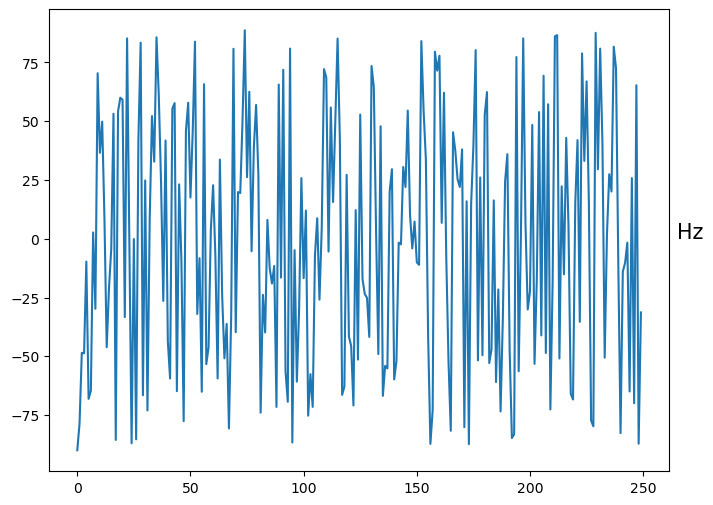

In [46]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))

timeseries = 1 * np.sin(2*np.pi * freq * time + np.pi/4) + noise
sample_rate = 500
duration = 1

n = sample_rate * duration
nhalf = round(n/2)

yf = fft(timeseries)
xf = fftfreq(n, 1 / sample_rate)

yf = yf[0:nhalf]
xf = xf[0:nhalf]

phaseradians = np.arctan(np.real(yf)/np.imag(yf))
phasedegrees = phaseradians * 180 / np.pi

plt.plot(xf, phasedegrees)

# Adding text to the figure
plt.text(265,0,'Hz',fontsize=15)
plt.show()

A feature of the above phase plot is of note. In particular, at most frequencies there is a non-zero phase value. 

Here is your question - why are there non-zero phase measures at the other frequencies?

**Big Hint**

Look at the complex values calculated at frequencies where there is no activity.

Here is an estimate of the magnitude and phase of 35 Hz activity.

In [47]:
complex_amplitude = np.exp(2*np.pi * 35j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(-0.061+0.0046j)

In [48]:
abs(spectrum)

0.061173196744979744

In [49]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
abs(phasedegrees)

85.69

When we compute the magnitude of 35 Hz activity, we sum the square of the real and imaginary terms. If the real and imaginary terms are near zero, the square of these terms will also be near zero. 

What about the complex term calculated at frequencies where there is no activity tells you that you will
often obtain a non-zero phase measure at these frequencies? Think about what terms go into the arctan function. (If you want, examine activity at other frequencies to see that the phase measure is usually non-zero.)

### <font color=red>DSP.05.G6.f) Judging Real Activity from Background Noise: Continued </font>

Create a power spectrum plot for a 40 Hz signal with a gain value of 1.5, a 45 degree phase offset, and noise.

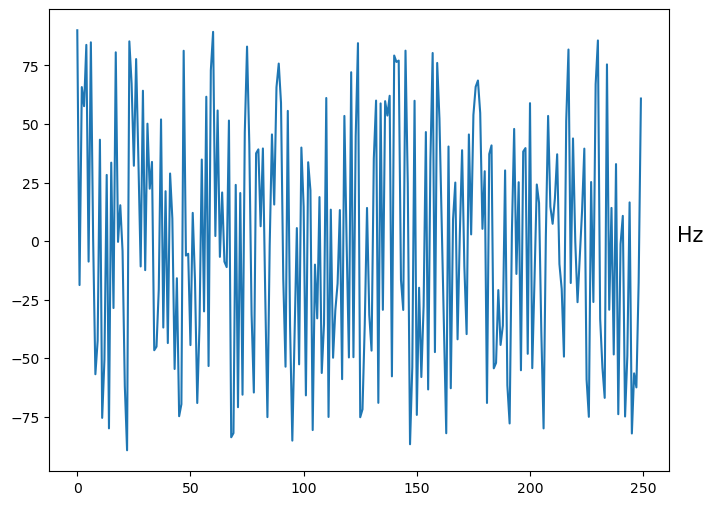

In [54]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))

timeseries = 1.5 * np.sin(2*np.pi * freq * time + np.pi/4) + noise
sample_rate = 500
duration = 1

n = sample_rate * duration
nhalf = round(n/2)

yf = fft(timeseries)
xf = fftfreq(n, 1 / sample_rate)

yf = yf[0:nhalf]
xf = xf[0:nhalf]

phaseradians = np.arctan(np.real(yf)/np.imag(yf))
phasedegrees = phaseradians * 180 / np.pi

plt.plot(xf, phasedegrees)

# Adding text to the figure
plt.text(265,0,'Hz',fontsize=15)
plt.show()

Compute the 40 Hz magnitude and phase values. 

In [55]:
complex_amplitude = np.exp(2*np.pi * 40j * time)
spectrum = round(sum(timeseries * complex_amplitude)*1/500,4) / 0.5
spectrum

(1.0664+1.1234j)

In [56]:
abs(spectrum)

1.548946906772469

In [57]:
phaseradians = round(np.arctan(np.real(spectrum)/np.imag(spectrum)),5)
phasedegrees = round(phaseradians * 180 / np.pi,2)
phasedegrees

43.51

Rerun the above code a few times. The phase measure is always approximately 45°. Thus, it looks like the phase
measures is in fact correctly measured.

Similar to what was done in the Tutorial section, to quantatively assess the accuarcy of our 40 Hz phase estimate let's obtain several samples of the phenomena of interest, obtaining measures of the mean and variance of the phase measures (across samples), and then across samples examine where in this distribution the 40 Hz phase values fall. If the 40 Hz phase distribution differs from the phase estimates across frequencies, then it is likely that the 40 Hz phase measure validly differs from the background phase measures.

Using the same gain, for a single 40 Hz + noise time series obtain the phase values from 0 to 250 Hz.

In [58]:
time = np.arange(0,1,1/500)
freq = 40
noise = np.random.normal(0,0.5,len(time))

timeseries = 1.5 * np.sin(2*np.pi * freq * time + np.pi/4) + noise
sample_rate = 500
duration = 1

n = sample_rate * duration
nhalf = round(n/2)

yf = fft(timeseries)
xf = fftfreq(n, 1 / sample_rate)

yf = yf[0:nhalf]
xf = xf[0:nhalf]

phaseradians = np.arctan(np.real(yf)/np.imag(yf))
phasedegrees = phaseradians * 180 / np.pi

phasedegrees

array([-9.00000000e+01, -1.33832503e+00,  1.62624615e+01, -7.26532120e+01,
        4.70231955e+01, -6.44218159e+01, -4.38006883e+01, -1.79005106e+01,
       -1.07092801e+01, -1.25313866e+01, -5.55891966e+01, -2.73488667e+01,
        3.04743551e+01,  1.50894838e+01,  1.41679041e+01,  2.10317132e+01,
       -8.61985082e+01,  6.74219262e+01, -8.19361736e+01, -1.50445747e+01,
        4.65285436e+01,  8.71861006e+01, -2.68547409e+01,  3.66058477e+00,
       -2.89279067e+01, -7.76465402e+01, -8.90784507e+01, -2.37797492e+00,
        4.86317769e+01,  4.77901049e+01, -8.38751260e+01, -5.99476038e+01,
       -8.95358241e+01,  1.37827419e+01, -5.28502842e+01, -9.61694498e+00,
        2.00367529e+01,  6.19481638e+01, -4.59889546e+01, -1.21370491e+01,
       -4.30314695e+01,  2.01911105e-02,  1.65393861e+00, -7.78212701e+01,
       -6.59936423e+01, -4.72885962e+01, -3.44250691e+01, -1.63830250e+01,
       -1.67746952e+01, -1.36295271e+01,  4.97221720e+01,  3.43391627e+01,
        3.80219356e+00,  

To compute a mean and variance, select several phase values between 0 and 250 Hz (say 50 different frequencies) to obtain a sample of the phase values. From this sample, calculate the mean. Repeat this process for many difference signal + noise samples, each time selecting a new set of 50 phase values and then computing the mean.

Here is how to accomplish the above. Below we computue phase values from 0 to 250 Hz for 1000 time series.

In [59]:
phasemeans = np.zeros(1000)
for x in range(0,999):
    phasemeans[x] = np.mean(np.random.choice(phasedegrees, 50, replace=False))

Calculate the mean and standard deviation for this distribution.

In [60]:
distmean = np.mean(phasemeans)
distmean

0.32602953177131316

In [61]:
distdev = np.std(phasemeans)
distdev

6.650052610174049

Use the magnatide mean and standard deviation values to plot a normal distribution.

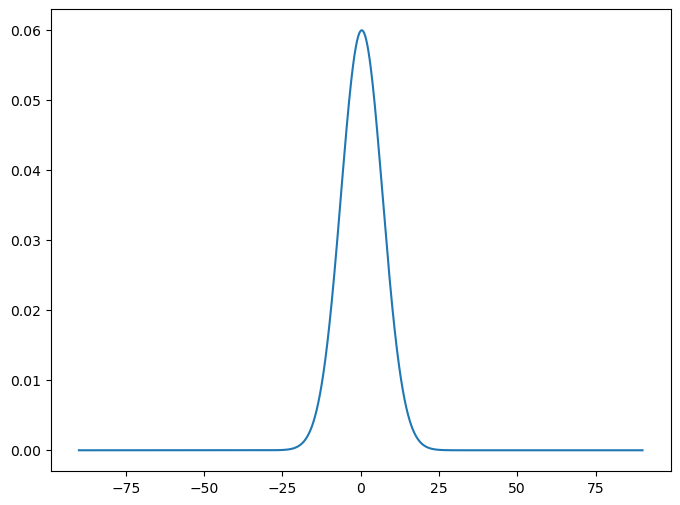

In [62]:
from scipy.stats import norm

#x-axis ranges from 10 and 30 with .01 steps
x = np.arange(-90, 90, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))


We want to determine whether we are accurately estimating the phase of 40 Hz activity. 

Obtain 1000 estimates of the 40 Hz phase. 

In [63]:
time = np.arange(0,1, 1/500)
freq = 40
N = 500
Nhalf = math.ceil(N/2)
sample_rate = 500
duration = 1
n = sample_rate * duration
nhalf = round(n/2)

fortyActivities = np.zeros(100)
for x in range(0,100): 
    noise = np.random.normal(0,0.5,len(time))
    timeseries = 1*np.sin(2*np.pi * freq * time + np.pi/4)+noise 
    yf = fft(timeseries)
    xf = fftfreq(n, 1 / sample_rate)
    yf = yf[0:nhalf]
    xf = xf[0:nhalf]
    phaseradians = np.arctan(np.real(yf)/np.imag(yf))
    phasedegrees = phaseradians * 180 / np.pi
    fortyActivities[x] = phasedegrees[40] 

In [64]:
abs(fortyActivities)

array([44.99824486, 43.91038529, 43.7274356 , 45.45473509, 44.93238807,
       44.04294295, 44.7613091 , 42.08139256, 44.15456205, 46.38885567,
       44.91605535, 44.16347441, 44.36651491, 44.66387225, 42.32121196,
       46.03842931, 44.02654993, 45.67613871, 46.39390094, 45.18136734,
       46.19142328, 43.45793428, 43.97974009, 46.31928859, 47.4454811 ,
       45.19168761, 47.22841317, 44.22609117, 42.79109889, 44.98154502,
       42.2683464 , 46.1487687 , 47.03340013, 45.70203511, 43.32562628,
       45.28191797, 44.89384117, 42.89116879, 46.85607941, 44.73290437,
       48.94605987, 46.50159471, 43.9108103 , 44.11873074, 44.08932821,
       46.8063831 , 43.71882408, 46.27197204, 47.0932361 , 46.9289441 ,
       43.2982026 , 44.60193532, 44.88260031, 44.45573834, 47.47440708,
       45.26852582, 48.94325473, 42.03462144, 44.77541109, 43.57434143,
       44.45812476, 46.43484252, 44.23146982, 46.16046099, 42.90160304,
       46.67903693, 45.11622652, 47.33973337, 43.11596297, 42.19

Compute the 40 Hz phase mean and standard deviation values.

In [65]:
fourtymean = np.mean(abs(fortyActivities))
fourtymean

44.95948973075865

In [66]:
fourtystd = np.std(abs(fortyActivities))
fourtystd

1.8648276625983697

Place 40 Hz phase distribution on the normal distrubtion plot we created above.

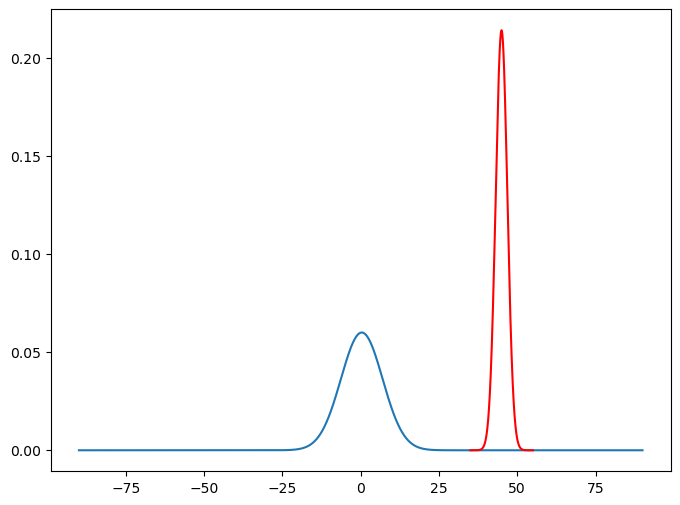

In [67]:
from scipy.stats import norm


x = np.arange(-90, 90, 0.01)
y = np.arange(35, 55, 0.01)

#define normal distributions
plt.plot(x, norm.pdf(x, distmean, distdev))
plt.plot(y, norm.pdf(y, fourtymean, fourtystd),'r')

The red line shows the distribution of 40 Hz phase values. This is somewhat strong quantitative evidence that the 40 Hz pjhase measure is different from the other phase measures (i.e., likely noise).

Outside the scope of this courseware, but if you have some knowledge of statistics, then you will know that we can use the noise and 40 Hz mean and standard deviation values to compute a t-test to quantify the similarity of the noise and 40 Hz distributions. 

No more work here. We're done! 